# Hypothesis Testing

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# import stock pricing and add a new feature - logreturn
stock = pd.read_csv('../data/stocks/microsoft.csv')
stock['logReturn'] = np.log(stock['Close'].shift(-1)) - np.log(stock['Close'])

*Log return goes up and down during the period*

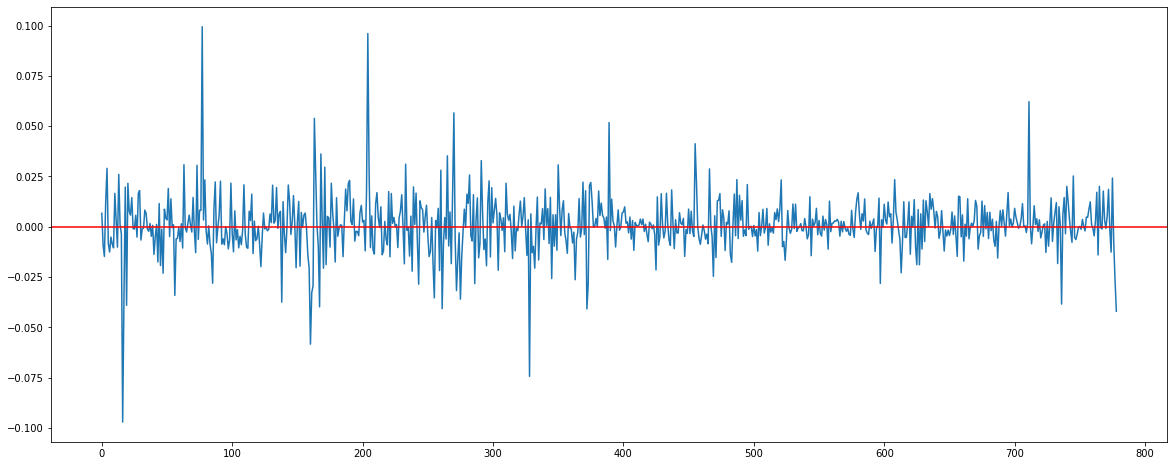

In [6]:
stock['logReturn'].plot(figsize=(20, 8))
plt.axhline(0, color='red')
plt.show()

# Steps for Hypothesis Testing

## Two-tail Test

### Step 1: Set hypothesis

$H_0 : \mu = 0$ 
$H_a : \mu \neq 0$

$H_0$ means the average stock return is 0.
$H_1$ means the average stock return is not equal to 0.

### Step 2: Calculate test statistic

In [9]:
sample_mean = stock['logReturn'].mean()
sample_std = stock['logReturn'].std(ddof=1)
n = stock['logReturn'].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

1.614147714000367


### Step 3: Set decision criteria (95% confidence level; $\alpha$ = 0.05)

In [10]:
# confidence level
alpha = 0.05

zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft  # z-distribution is symmetric 
print(zleft, zright)

-1.9599639845400545 1.9599639845400545


### Step 4:  Make decision - shall we reject $H_0$?

In [12]:
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright or zhat<zleft))

At significant level of 0.05, shall we reject: False


## One-tail Test

### Step 1: Set hypothesis

$H_0 : \mu \leq 0$ 
$H_a : \mu > 0$

### Step 2: Calculate test statistic

In [19]:
# step 2
sample_mean = stock['logReturn'].mean()
sample_std = stock['logReturn'].std(ddof=1)
n = stock['logReturn'].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

1.614147714000367


### Step 3: Set decision criteria (95% confidence level; $\alpha$ = 0.05)

In [20]:
alpha = 0.05

zright = norm.ppf(1-alpha, 0, 1)
print(zright)

1.6448536269514722


### Step 4:  Make decision - shall we reject $H_0$?

In [21]:
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright))

At significant level of 0.05, shall we reject: False


# An alternative method: p-value (from Step 3)

In [22]:
p = 1 - norm.cdf(zhat, 0, 1)
print(p)

0.053247694996968464


In [23]:
print('At significant level of {}, shall we reject: {}'.format(alpha, p < alpha))

At significant level of 0.05, shall we reject: False
